In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import sys
import os
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
from support.omniwheel_calculation import *

Simulated data

This simulated data is

Moving forward first, and sideways after that

Encoder Top: first 10000 values are zero
            next 10000 values are 0 to 10000

Encoder Bottom left: first 10000 values are 0 to 10000
            next 10000 values are zero

Encoder Bottom right: first 10000 values are 0 to 10000
            next 10000 values are zero

In [2]:
w1 = np.zeros(10000)
w2 = np.arange(0, 10000, 1)
w3 = np.arange(0, 10000, 1)

temp = np.full(10000, 10000)
w1 = np.append(w1, w2)
w2 = np.append(w2, temp)
w3 = np.append(w3, temp)


Plotting simulated data for respective wheels

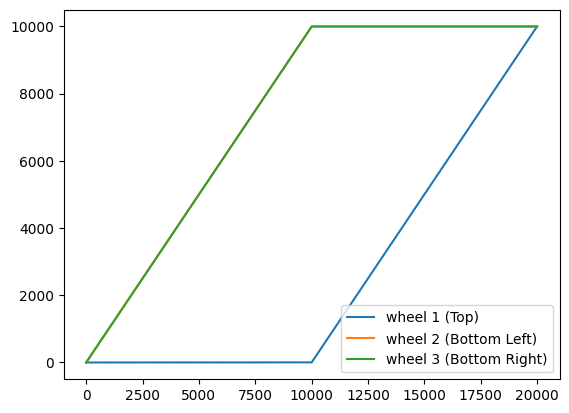

In [3]:
plt.plot(w1, label='wheel 1 (Top)')
plt.plot(w2, label='wheel 2 (Bottom Left)')
plt.plot(w3, label='wheel 3 (Bottom Right)')
plt.legend()

In [4]:
y = 1
x = 1
mat = np.array([[-y, 1, 0], [-x, 0, -1], [x, 0, -1]])
pmat = np.linalg.pinv(mat)


In [5]:
df = pd.DataFrame([w1, w2, w3], index=['e_t', 'e_rr', 'e_rl']).T
df

,e_t,e_rr,e_rl
0,0.0,0.0,0.0
1,0.0,1.0,1.0
2,0.0,2.0,2.0
3,0.0,3.0,3.0
4,0.0,4.0,4.0
...,...,...,...
19995,9995.0,10000.0,10000.0
19996,9996.0,10000.0,10000.0
19997,9997.0,10000.0,10000.0
19998,9998.0,10000.0,10000.0


In [6]:
df = set_zero(df)
df, ang_col = get_angular_velocity(df)
df, vel_col = get_directional_velocity(df, ang_col, 1, x, y)

In [7]:
df, col_names = get_position(df)

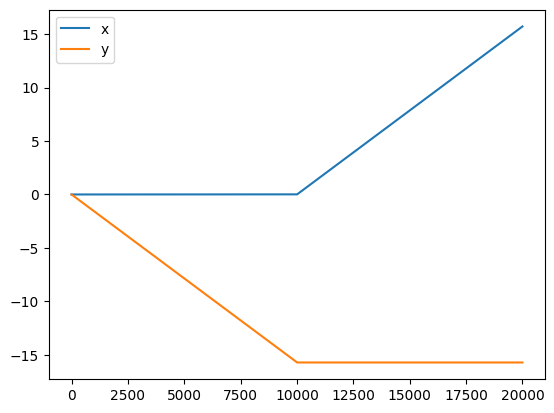

In [10]:
plt.plot(df["x_val"], label="x")
plt.plot(df["y_val"], label="y")
plt.legend()

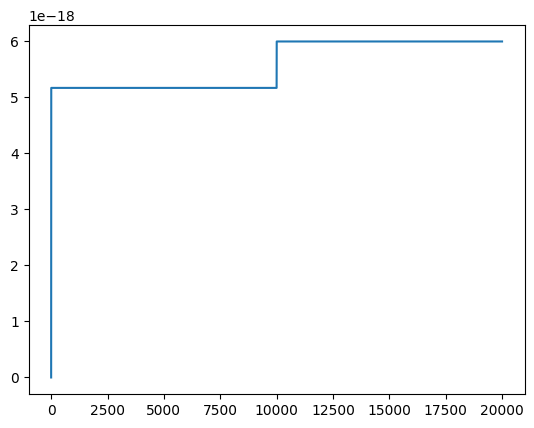

In [11]:
# plt.plot(df["w"])
# plt.plot(df["vx"][5:])
# plt.plot(df["vy"])